# Explore an entirely analytic model which includes no Poisson error

In this example, we explore the usefulness of a completely analytic solution to an ideal "sample". For details, see Appendix E of the MRP paper. In brief, the "ideal sample" is composed of non-Poisson limited haloes extracted from a pure MRP distribution within some physical volume. As such, the solution is *a priori* the input parameters of the MRP distribution. Finding the covariance of those parameters is our task.

The whole framework of this problem has already been implemented in ``mrpy.analytic_model``. We will use that framework to answer some questions.

In [2]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from mrpy.analytic_model import IdealAnalytic

In [3]:
# Fiducial Parameters
beta = 0.75
alpha = -1.85
hs = 14.5
V=400.0**3 # Physical volume

# Some constants
log_mmin = np.linspace(11,15,10)
cols = ['b', 'g', 'y', 'k', 'c', 'r', 'm']
ss = np.linspace(0,2,5)


## What is the expected variance of parameters versus scaling and truncation mass?

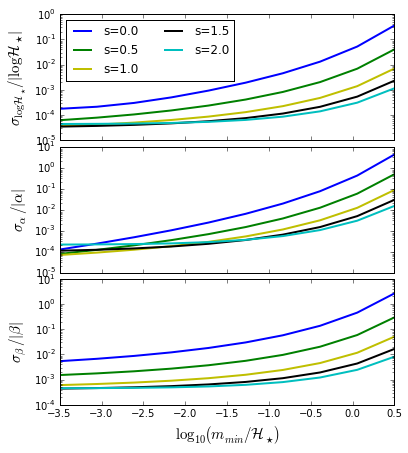

In [4]:
fig,ax = plt.subplots(3,1,sharex=True,sharey=False,figsize=(6,7),subplot_kw={"yscale":'log'},
                     gridspec_kw={"hspace":0.05})

for i,s in enumerate(ss):
    K = IdealAnalytic(V=V,log_mmin=log_mmin,logHs=hs,alpha=alpha,beta=beta,scale=s)
    ax[0].plot(log_mmin-hs,np.sqrt(K.cov[:,0,0])/np.abs(hs),   color=cols[i],label="s="+str(s),lw=2)
    ax[1].plot(log_mmin-hs,np.sqrt(K.cov[:,1,1])/np.abs(alpha),color=cols[i],lw=2)
    ax[2].plot(log_mmin-hs,np.sqrt(K.cov[:,2,2])/np.abs(beta), color=cols[i],lw=2)
    
ax[0].legend(loc=0,ncol=2)

ax[0].set_ylabel(r"$\sigma_{\log \mathcal{H}_\star}/|\log \mathcal{H}_\star|$",fontsize=15)
ax[1].set_ylabel(r"$\sigma_\alpha/|\alpha|$",fontsize=15)
ax[2].set_ylabel(r"$\sigma_\beta/|\beta|$",fontsize=15)
ax[2].set_xlabel(r"$\log_{10}\left(m_{min}/\mathcal{H}_\star\right)$",fontsize=15)

# Save for the paper!
fig.savefig("../../../mrpArticle/figures/variance.pdf")

## What is the expected correlation of parameters versus scaling and truncation mass?

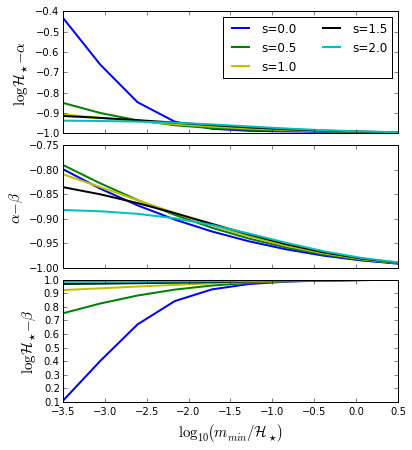

In [5]:
fig,ax = plt.subplots(3,1,sharex=True,sharey=False,figsize=(6,7),
                     gridspec_kw={"hspace":0.1})

for i,s in enumerate(ss):
    K = IdealAnalytic(V=V,log_mmin=log_mmin,logHs=hs,alpha=alpha,beta=beta,scale=s)
    ax[0].plot(log_mmin-hs,K.corr[:,0,1],color=cols[i],label="s="+str(s),lw=2)
    ax[1].plot(log_mmin-hs,K.corr[:,1,2],color=cols[i],lw=2)
    ax[2].plot(log_mmin-hs,K.corr[:,0,2],color=cols[i],lw=2)
    
ax[0].legend(loc=0,ncol=2)

ax[0].set_ylabel(r"$\log \mathcal{H}_\star-\alpha$",fontsize=15)
ax[1].set_ylabel(r"$\alpha-\beta$",fontsize=15)
ax[2].set_ylabel(r"$\log \mathcal{H}_\star-\beta$",fontsize=15)
ax[2].set_xlabel(r"$\log_{10}\left(m_{min}/\mathcal{H}_\star\right)$",fontsize=15)

# Saving for the paper!
fig.savefig("../../../mrpArticle/figures/correlations.pdf")